In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [5]:
df.dtypes.value_counts()


,count
float64,30
int64,1


In [6]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean_texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean_perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean_area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean_smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean_compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean_concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean_concave_points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean_symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean_fractal_dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


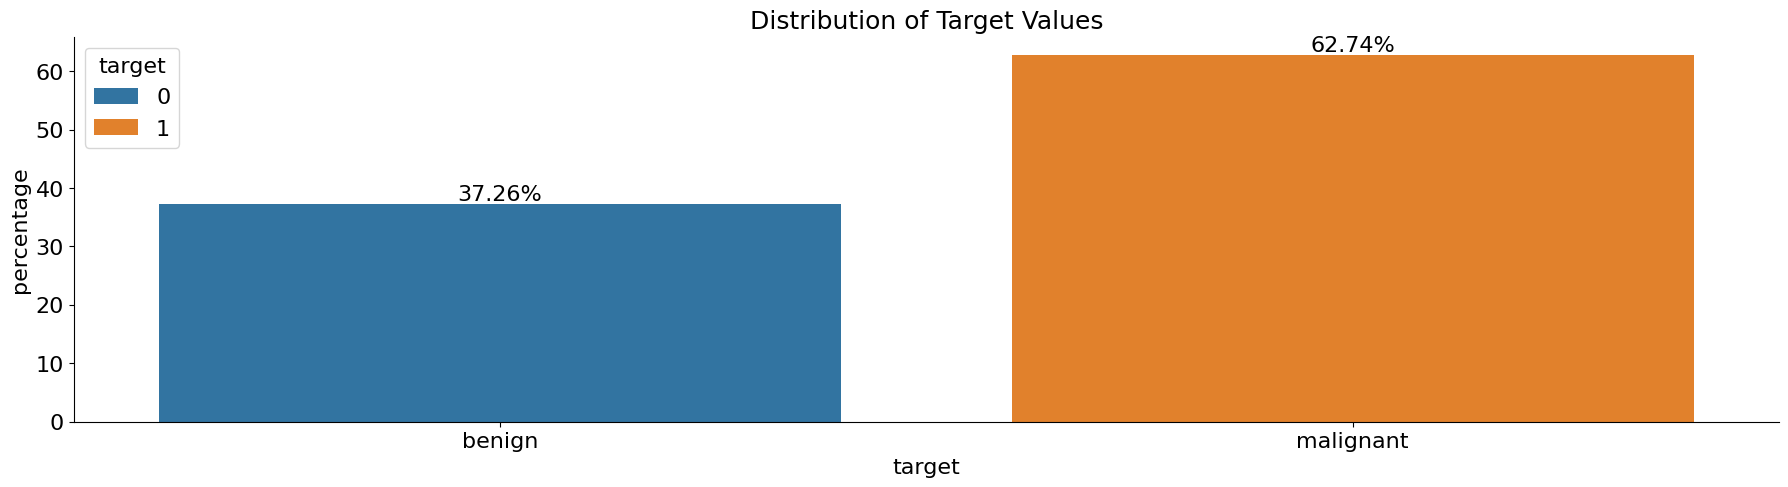

In [7]:
value_counts_df = (round(df.target.value_counts(normalize=True)*100,2)).reset_index()
value_counts_df.columns = ['target', 'percentage']
ax = sns.barplot(x=value_counts_df['target'], y=value_counts_df['percentage'], hue=value_counts_df['target'], dodge=False)
ax.bar_label(ax.containers[0], fmt="%.2f%%")
ax.bar_label(ax.containers[1],fmt="%.2f%%")
plt.xticks(ticks=[0,1], labels=['benign', 'malignant'])
plt.title('Distribution of Target Values', fontsize=18)
plt.show()

In [8]:
num_cols = list(df.select_dtypes('float64').columns)
unrelated_num_cols = []
categorical_col = 'target'

for i in num_cols:
    # Perform Kruskal-Wallis test
    grouped_data = [df[i][df[categorical_col] == category] for category in df[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    # Set the significance level (alpha)
    alpha = 0.05

    # Print the results with appropriate text color
    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value:.2e}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value:.2e}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
        unrelated_num_cols.append(i)

ANOVA statistic: 646.98
p-value: 8.47e-96
Reject the null hypothesis: There is a significant relationship between mean_radius and target

ANOVA statistic: 118.1
p-value: 4.06e-25
Reject the null hypothesis: There is a significant relationship between mean_texture and target

ANOVA statistic: 697.24
p-value: 8.44e-101
Reject the null hypothesis: There is a significant relationship between mean_perimeter and target

ANOVA statistic: 573.06
p-value: 4.73e-88
Reject the null hypothesis: There is a significant relationship between mean_area and target

ANOVA statistic: 83.65
p-value: 1.05e-18
Reject the null hypothesis: There is a significant relationship between mean_smoothness and target

ANOVA statistic: 313.23
p-value: 3.94e-56
Reject the null hypothesis: There is a significant relationship between mean_compactness and target

ANOVA statistic: 533.79
p-value: 9.97e-84
Reject the null hypothesis: There is a significant relationship between mean_concavity and target

ANOVA statistic: 861.

In [9]:
print(f'The columns that failed the ANOVA test are {unrelated_num_cols}. These columns don\'t help in making predictions.')

The columns that failed the ANOVA test are ['mean_fractal_dimension', 'texture_error', 'smoothness_error', 'symmetry_error', 'fractal_dimension_error']. These columns don't help in making predictions.


In [10]:
# Creating a sqlite3 database to run some SQL Queries
conn = sqlite3.connect('database.db' )

# Write the DataFrame to a table in the database
df.to_sql('data', conn, if_exists='replace', index=False)


569

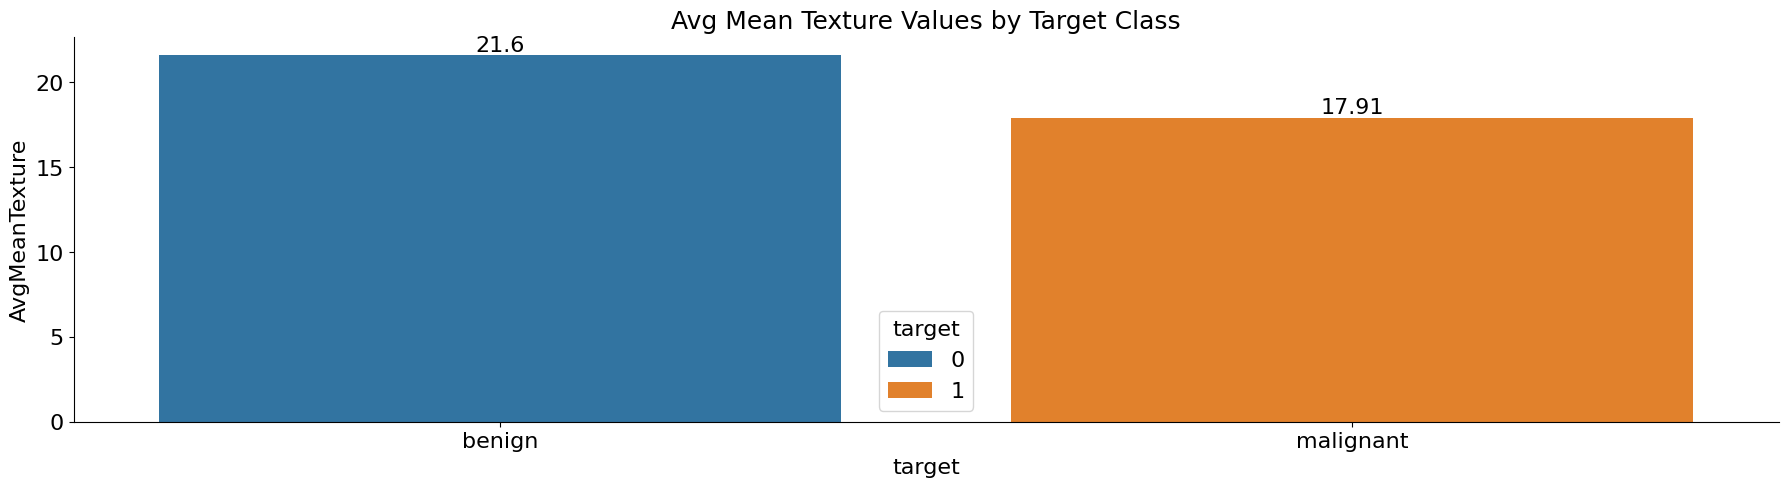

In [11]:
query = '''

select target,round(avg(mean_texture),2) as AvgMeanTexture
from data group by target
'''
temp = pd.read_sql(query, conn)
ax = sns.barplot(x=temp['target'], y=temp['AvgMeanTexture'], hue=temp['target'], dodge=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(ticks=[0,1], labels=['benign', 'malignant'])
plt.title('Avg Mean Texture Values by Target Class', fontsize=18)
plt.show()

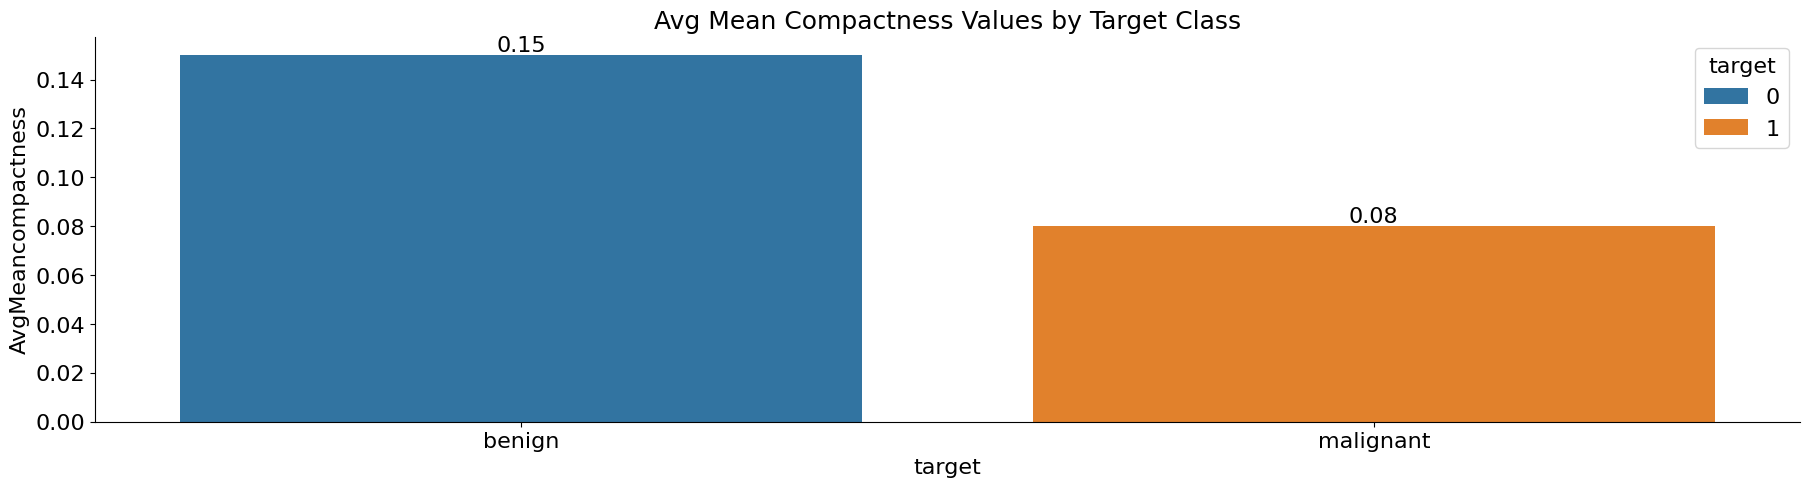

In [12]:
query = '''

select target,round(avg(mean_compactness),2) as AvgMeancompactness
from data group by target
'''
temp = pd.read_sql(query, conn)
ax = sns.barplot(x=temp['target'], y=temp['AvgMeancompactness'], hue=temp['target'], dodge=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(ticks=[0,1], labels=['benign', 'malignant'])
plt.title('Avg Mean Compactness Values by Target Class', fontsize=18)
plt.show()

In [13]:
query = '''

SELECT
    target, round(max(mean_compactness),3) as Max_MeanCompactness,
    round(min(mean_compactness),3) as Min_MeanCompactness from data where target = 0

UNION

SELECT
    target, round(max(mean_compactness),3) as Max_MeanCompactness,
    round(min(mean_compactness),3) as Min_MeanCompactness from data where target = 1

'''
temp = pd.read_sql(query, conn)
temp

,target,Max_MeanCompactness,Min_MeanCompactness
0,0,0.345,0.046
1,1,0.224,0.019


In [14]:
fig = px.scatter(df,
                 x="mean_concave_points",
                 size='mean_concave_points',
                 color="target",
                 hover_data=["target"],
                 template="simple_white",
                 labels={"mean_concave_points": "Mean Concave Points"},
                 title="Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
fig.show()

In [15]:
#Dropping the unrelated cols we found out using ANOVA
df.drop(labels=unrelated_num_cols, axis=1, inplace=True)
#Columns in the dataframe after dropping columns
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'radius_error',
       'perimeter_error', 'area_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension', 'target'],
      dtype='object')

In [16]:
input_cols = list(filter(lambda x : x!='target', df.columns))
target_col =  'target'

In [17]:
inputs_df = df[list(input_cols)].copy()
inputs_df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,radius_error,perimeter_error,area_error,compactness_error,concavity_error,concave_points_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
240,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.3242,1.996,27.19,0.01248,0.01810,0.011030,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.4565,2.861,43.14,0.01488,0.02647,0.009921,16.99,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.11840,0.2651,0.07397
48,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,0.2636,1.848,19.87,0.01427,0.02322,0.005660,13.76,20.70,89.88,582.6,0.1494,0.2156,0.3050,0.06548,0.2747,0.08301
260,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.15190,0.09333,0.1814,0.3977,2.587,52.34,0.01578,0.02117,0.008185,24.33,39.16,162.30,1844.0,0.1522,0.2945,0.3788,0.16970,0.3151,0.07999
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.4209,2.805,44.64,0.02321,0.04303,0.013200,18.79,17.04,125.00,1102.0,0.1531,0.3583,0.5830,0.18270,0.3216,0.10100


In [18]:
targets = df[target_col]
targets.sample(5)

,target
451,0
83,0
221,1
505,1
122,0


In [19]:
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,radius_error,perimeter_error,area_error,compactness_error,concavity_error,concave_points_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,0.369034,0.273811,0.351398,0.135682,0.300625,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,0.124440,0.125660,0.081323,0.046970,0.253836,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,0.180370,0.162922,0.283955,0.096768,0.389847,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,0.126655,0.038155,0.543215,0.142955,0.353665,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,0.220563,0.163688,0.167918,0.143636,0.357075,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [20]:
#Extracting input values
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)

#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [21]:
print("Shape of eigenvalues:", eigen_values.shape)
print("Shape of eigenvectors:", eigen_vectors.shape)
print("Shape of covariance matrix:", covariance_matrix.shape)

Shape of eigenvalues: (25,)
Shape of eigenvectors: (25, 25)
Shape of covariance matrix: (25, 25)


In [22]:
covariance_matrix[0]

array([0.027818  , 0.00785484, 0.02794603, 0.02458229, 0.00361231,
       0.01367458, 0.02108345, 0.02645754, 0.00341174, 0.01137405,
       0.01071215, 0.01042819, 0.00462112, 0.00246906, 0.0073333 ,
       0.02780391, 0.00811481, 0.02693902, 0.02196388, 0.0030081 ,
       0.0105267 , 0.01464405, 0.028038  , 0.00333488, 0.00013961])

In [23]:
eigen_vectors[0]

array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [24]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 0.3301


In [25]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))):
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print(f'At {i+1} PC, Explained Variance is {round(c,2)}%')
        break

At 1 PC, Explained Variance is 59.5%
At 2 PC, Explained Variance is 74.84%
At 3 PC, Explained Variance is 82.28%
At 4 PC, Explained Variance is 87.3%
At 5 PC, Explained Variance is 90.78%


In [26]:
variance_percentage = np.around(explained_variance[-1], 2)
num_principal_components = len(explained_variance)
print(f"Explained Variance Achieved : {variance_percentage}% , PCs needed : {num_principal_components}")

Explained Variance Achieved : 90.78% , PCs needed : 5


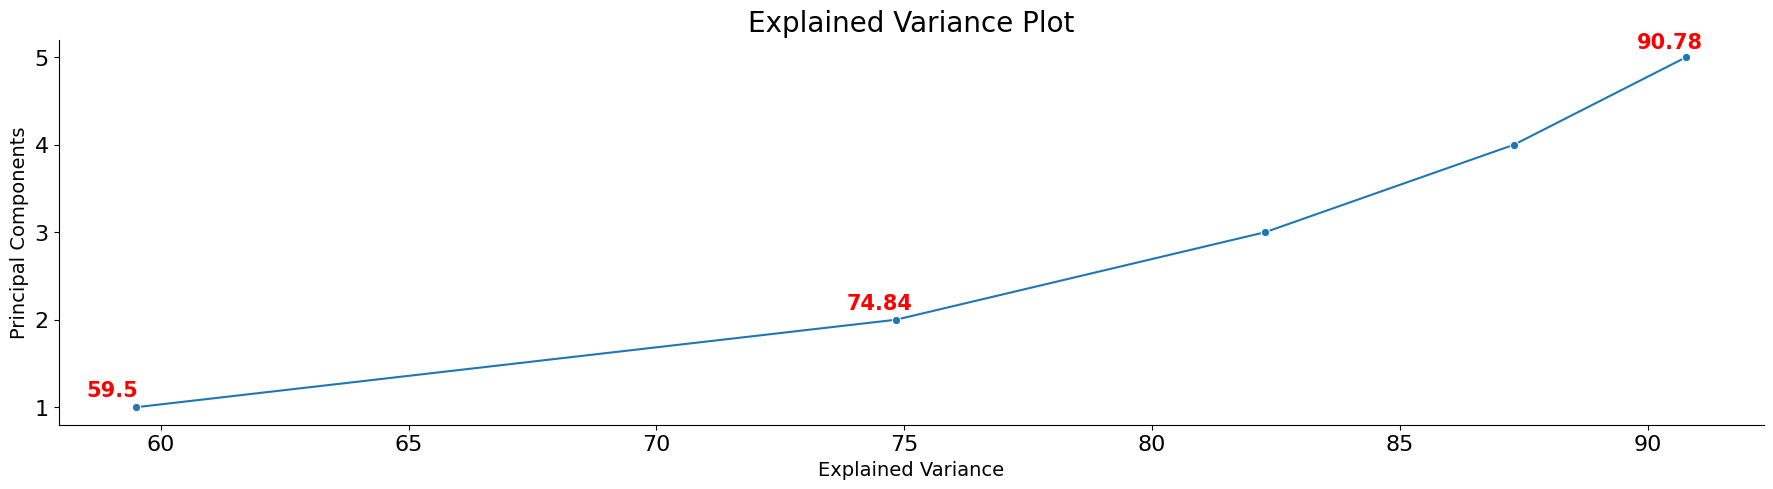

In [27]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1), marker='o')
plt.annotate(f'{round(explained_variance[0],2)}', (round(explained_variance[0],2)-1, 1.12),
             fontsize=15, fontweight='bold', color='red')
plt.annotate(f'{round(explained_variance[1],2)}', (round(explained_variance[1],2)-1, 2.12),
             fontsize=15, fontweight='bold', color='red')
plt.annotate(f'{round(explained_variance[4],2)}', (round(explained_variance[4],2)-1, 5.1),
             fontsize=15, fontweight='bold', color='red')
plt.yticks(range(1,len(explained_variance)+1,1))
plt.title('Explained Variance Plot', fontsize=20)
plt.xlabel('Explained Variance', fontsize=14)
plt.ylabel('Principal Components',fontsize=14)
plt.show()


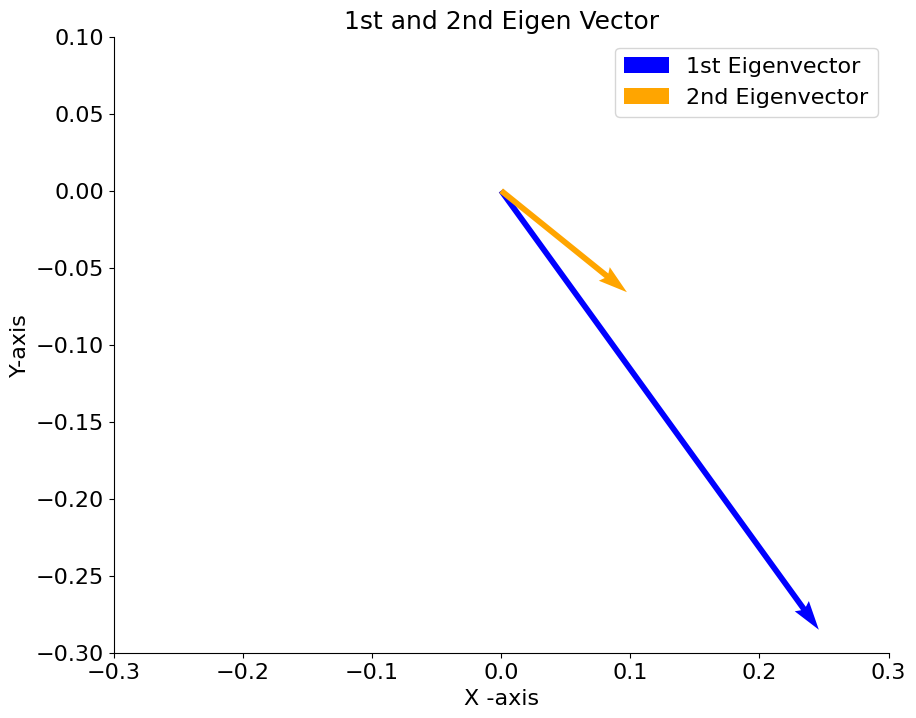

In [30]:
def plot_vectors(vectors, colors, labels):
    plt.figure(figsize=(10, 8))
    for i, vec in enumerate(vectors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])

plot_vectors([eigen_vectors[0], eigen_vectors[1]] , ['blue', 'orange'], ['1st Eigenvector', '2nd Eigenvector'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('1st and 2nd Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.3)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()

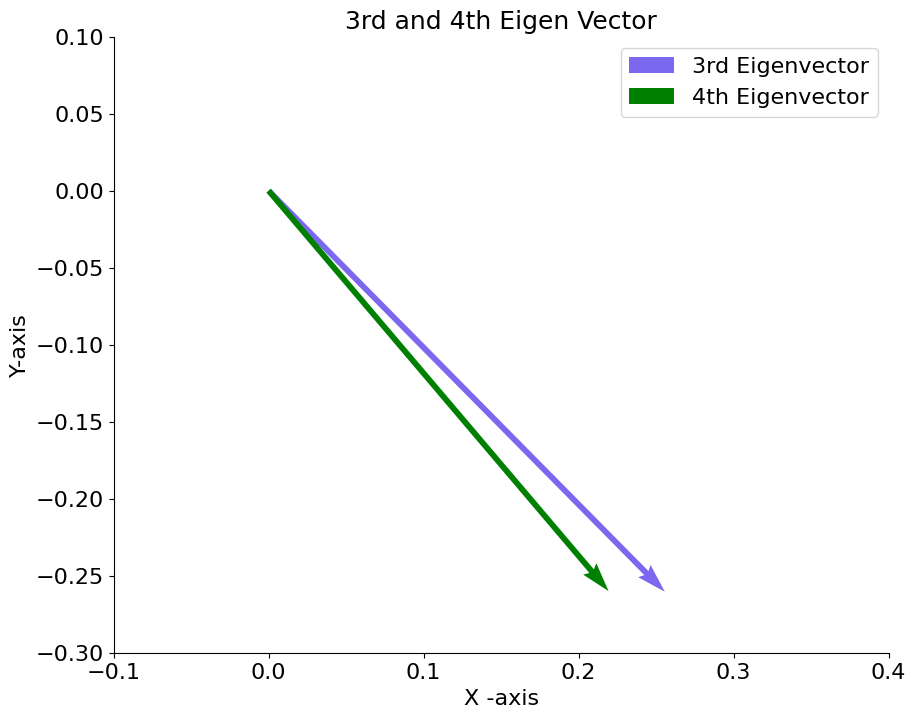

In [31]:
plot_vectors([eigen_vectors[2], eigen_vectors[3]] , ['mediumslateblue', 'green'], ['3rd Eigenvector', '4th Eigenvector'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('3rd and 4th Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.legend(['3rd Vector', '4th Vector'])
plt.ylabel('Y-axis')
plt.xlim(-0.1, 0.4)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()


In [32]:
pc = eigen_vectors[0:len(explained_variance)]
print(f'The shape of the Principal Component Matrix is {pc.shape}')

The shape of the Principal Component Matrix is (5, 25)


In [33]:
print('The Original PC array')
pc[0]

The Original PC array


array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [34]:
print('The Transpose of PC array')
pc.T[0]

The Transpose of PC array


array([0.24595212, 0.09735703, 0.25557267, 0.21928724, 0.10784383])

In [35]:
transformed_df = np.dot(inputs_df.iloc[:,0:len(inputs_df.columns)],pc.T)
new_df = pd.DataFrame(transformed_df,columns=["PC"+str(i+1) for i in range(len(pc))])
new_df['Target'] = df['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,Target
0,0.034773,0.398491,0.686401,-1.055867,-0.138927,0
1,-0.154531,0.489669,0.468577,-0.786602,0.111376,0
2,-0.119872,0.437182,0.444838,-1.045942,0.024061,0
3,0.240011,0.060654,0.452463,-1.322787,-0.231652,0
4,-0.060162,0.451352,0.439179,-0.755014,0.015844,0


In [36]:
new_df['Target'] = new_df['Target'].astype('int')

In [37]:
fig = px.scatter(new_df, x='PC1', y='PC2', color='Target', template="simple_white")
fig.update_layout(title='Top 2 PCs Scatterplot', title_font_size=18)
fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')

# Add annotations for quadrants
fig.add_annotation(x=-0.45, y=0.1, text='Quadrant 2', font_size=14, font_color='red')
fig.add_annotation(x=0.23, y=0.1, text='Quadrant 1', font_size=14, font_color='red')

fig.update_xaxes(title='PC1')
fig.update_yaxes(title='PC2')

fig.show()


In [38]:
new_df[new_df.Target==0].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
564,-0.190174,0.499826,0.468314,-1.011776,0.073062,0
262,-0.121538,0.419660,0.274304,-0.765737,0.212720,0
47,0.102028,0.122369,0.375547,-1.040258,-0.174397,0
250,-0.200510,0.430664,0.414180,-1.000339,0.171659,0
259,-0.050307,0.176371,0.326988,-1.294492,-0.056955,0


In [39]:
new_df[new_df.Target==1].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
440,0.037524,0.137415,0.194401,-0.780226,0.019199,1
185,0.120794,0.034334,0.264898,-0.408311,-0.042264,1
467,0.070043,0.024894,0.183903,-0.462820,-0.011127,1
532,0.020084,0.177784,0.261792,-0.508256,-0.045069,1
334,-0.000093,0.131938,0.159061,-0.473616,0.003482,1


In [40]:
label, counts = np.unique(targets, return_counts=True)
# compute the class weights
counts = max(counts) / counts
class_weights = dict(zip(label, np.around(counts,3)))
print('=== CLASS WEIGHTS ===')
print(class_weights)

=== CLASS WEIGHTS ===
{np.int64(0): np.float64(1.684), np.int64(1): np.float64(1.0)}


In [41]:
#Splitting the data into train and validation set
train_inputs, val_inputs, train_targets, val_targets = train_test_split(new_df, targets, test_size=0.20, random_state=42)
print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

X_train Shape - (455, 6) , y_train Shape - (455,)
X_test shape - (114, 6) , y_test shape - (114,)


In [42]:
#Creating a list of classifier models
names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weights, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weights, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weights, random_state=42)]

In [43]:
# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this as needed

# Initialize an empty list to store scores
scores = []

for name, clf in zip(names, classifiers):
    # Perform k-fold cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, train_inputs, train_targets, cv=num_folds)
    mean_score = np.mean(cv_scores)
    scores.append(mean_score)

# Create a DataFrame to store the results
scores_df = pd.DataFrame()
scores_df['Name'] = names
scores_df['CV Mean score'] = np.around(scores, 3)

# Sort the DataFrame by score in descending order
sorted_scores_df = scores_df.sort_values('CV Mean score', ascending=False)
sorted_scores_df

,Name,CV Mean score
0,Logistic Regression,1.0
1,KNN,1.0
2,Linear SVM,1.0
3,Gradient Boosting,1.0
4,Decision Tree,1.0
5,Random Forest,1.0


In [44]:
#Initiating the model
model = LogisticRegression(solver='liblinear', random_state=42,  n_jobs=-1, class_weight=class_weights)

#fitting the model
model.fit(train_inputs, train_targets)

#making the predictions
LRtrain_preds = model.predict(val_inputs)

#Creating the confusion matrix
confusionmatrix = np.around(confusion_matrix(val_targets, LRtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, template='ggplot2',text_auto=True, aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()


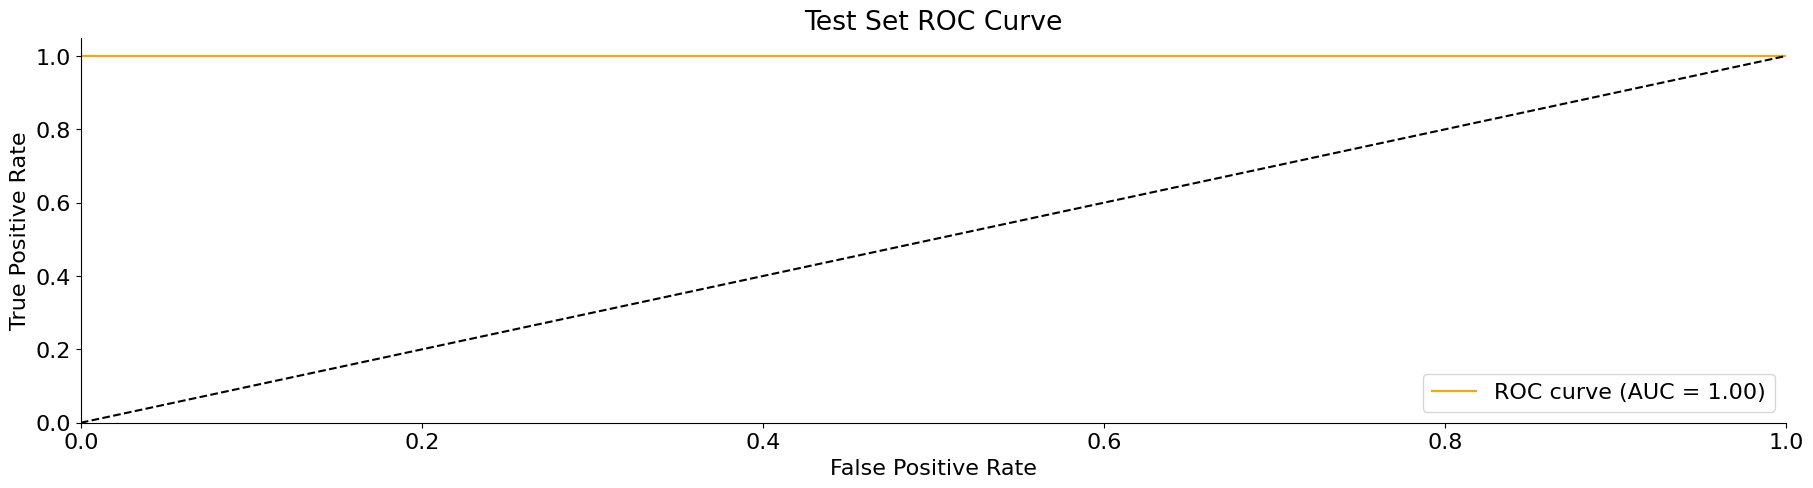

In [45]:
# Assuming you have your model predictions and true labels
y_pred = model.predict(val_inputs)  # Replace with your model's predictions
fpr, tpr, thresholds = roc_curve(val_targets, y_pred)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(val_targets, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc), color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [46]:
misclassified_count = np.sum(val_targets != LRtrain_preds)
total_cases = len(val_targets)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} out of {total_cases} cases were misclassified, Error rate : {error_rate}%.")

0 out of 114 cases were misclassified, Error rate : 0.0%.


In [47]:
X = df[input_cols].values
y = df[target_col].values
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Fit the model to the data and transform the data using the fit
X_lda = lda.fit_transform(X, y)
# Print the shape of the original data and the transformed data
print("Original Data shape:",X.shape, "\nModified Data shape:", X_lda.shape)

Original Data shape: (569, 25) 
Modified Data shape: (569, 1)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [49]:
LDAtrain_preds = lda.predict(X_train)
confusionmatrix = np.around(confusion_matrix(y_train, LDAtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix,
                template='simple_white',
                text_auto=True,
                aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

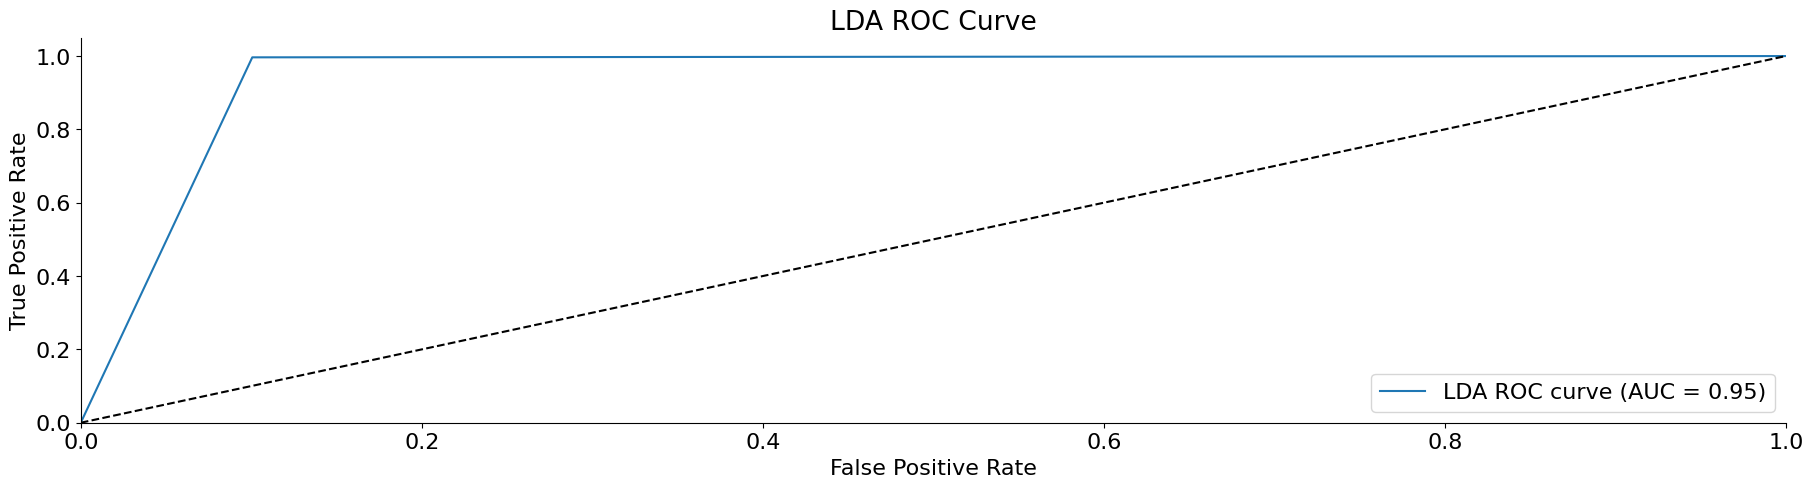

In [50]:
# Assuming you have your model predictions and true labels
y_pred = lda.predict(X_train)  # Replace with your model's predictions
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_train, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='LDA ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [51]:
misclassified_count = len(y_train[y_train != LDAtrain_preds])
total_cases = len(y_train)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} / {total_cases} cases misclassified by LDA, Error rate : {error_rate}%.")

18 / 455 cases misclassified by LDA, Error rate : 3.956%.
